In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
conn = sqlite3.connect('../data/database.db')
c = conn.cursor()

In [3]:
# Only the following countries will be queried throughout this notebook

countries = """("Germany", "United Kingdom", "France", "Italy", "Spain", "Netherlands", "Switzerland", "Sweden", "Poland", "Belgium")"""

#### Overall and regional primary fuel analysis

In [4]:
c.execute("""
DROP TABLE IF EXISTS overall_number;
    """)
c.execute("""
CREATE TABLE overall_number AS
  SELECT primary_fuel, COUNT(name)
  FROM power_table
  WHERE country_long IN """ + countries + """
  GROUP BY primary_fuel
  ORDER BY primary_fuel ASC;
    """)
dict_1 = {}
for row in c.execute("""
SELECT * FROM overall_number;
    """):
    print(row)
    dict_1[row[0]] = row[1]
    
c.execute("""
DROP TABLE IF EXISTS overall_capacity;
    """)
c.execute("""
CREATE TABLE overall_capacity AS
  SELECT primary_fuel, SUM(capacity_mw)
  FROM power_table
  WHERE country_long IN """ + countries + """
  GROUP BY primary_fuel
  ORDER BY primary_fuel ASC;
    """)
dict_2 = {}
for row in c.execute("""
SELECT * FROM overall_capacity;
    """):
    print(row)
    dict_2[row[0]] = row[1]

labels = []
for i in dict_1:
    labels.append(i)
for i in dict_2:
    if i in labels:
        continue
    else:
        labels.append(i)

sizes_1 = []
sizes_2 = []
for i in labels:
    if i in dict_1:
        sizes_1.append(dict_1[i])
    else:
        sizes_1.append(0)
    if i in dict_2:
        sizes_2.append(dict_2[i])
    else:
        sizes_2.append(0)
sizes_3 = np.array(sizes_2) / np.array(sizes_1)
sizes_3 = np.nan_to_num(sizes_3)
sizes_3 = sizes_3.tolist()

('Biomass', 403)
('Coal', 211)
('Cogeneration', 7)
('Gas', 408)
('Geothermal', 34)
('Hydro', 1181)
('Nuclear', 50)
('Oil', 89)
('Other', 15)
('Solar', 2290)
('Waste', 410)
('Wave and Tidal', 8)
('Wind', 1937)
('Biomass', 5186.1)
('Coal', 117963.20999999999)
('Cogeneration', 3006.0)
('Gas', 140395.14399999997)
('Geothermal', 861.5)
('Hydro', 88617.10089999992)
('Nuclear', 109941.86)
('Oil', 22783.971000000005)
('Other', 1141.5)
('Solar', 18055.280859999966)
('Waste', 3941.5540000000015)
('Wave and Tidal', 278.2)
('Wind', 48891.08549999992)


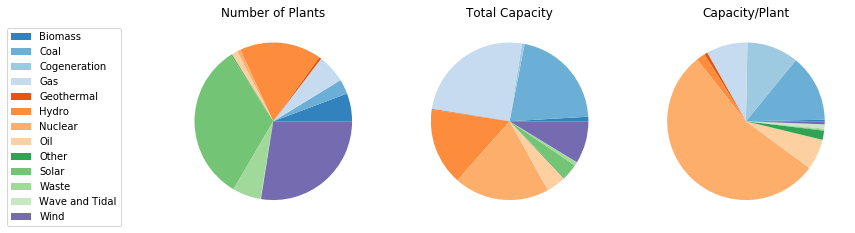

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(13))

axs[0].pie(sizes_1, colors=colors)
axs[1].pie(sizes_2, colors=colors)
axs[2].pie(sizes_3, colors=colors)

axs[0].legend(labels=labels, bbox_to_anchor=(-0.25, 1))

axs[0].set(title="Number of Plants") # The total number of this type of plant
axs[1].set(title="Total Capacity") # The total capacity output from this type of plant in MW
axs[2].set(title="Capacity/Plant") # The mean average capacity output in MW per plant for each type of plant

plt.show()

# The following pie charts are split into three different calculations
# The three types of calculation are explained above

#### Regional primary_fuel

In [6]:
c.execute("""
DROP TABLE IF EXISTS regional_number;
    """)
c.execute("""
CREATE TABLE regional_number AS
    SELECT country_long, primary_fuel, COUNT(name)
    FROM power_table
    WHERE country_long IN """ + countries + """
    GROUP BY country_long, primary_fuel
    ORDER BY country_long ASC, primary_fuel ASC;
    """)
dict_3 = {}
for row in c.execute("""
SELECT * FROM regional_number;
    """):
    print(row)
    if row[0] in dict_3:
        dict_3[row[0]][row[1]] = row[2]
    else:
        dict_3[row[0]] = {row[1]: row[2]}

c.execute("""
DROP TABLE IF EXISTS regional_capacity;
    """)
c.execute("""
CREATE TABLE regional_capacity AS
    SELECT country_long, primary_fuel, SUM(capacity_mw)
    FROM power_table
    WHERE country_long IN """ + countries + """
    GROUP BY country_long, primary_fuel
    ORDER BY country_long ASC, primary_fuel ASC;
    """)
dict_4 = {}
for row in c.execute("""
SELECT * FROM regional_capacity;
    """):
    print(row)
    if row[0] in dict_4:
        dict_4[row[0]][row[1]] = row[2]
    else:
        dict_4[row[0]] = {row[1]: row[2]}

sizes_1 = []
sizes_2 = []
sizes_3 = []
for j in dict_3:
    sizes_1.append([])
    sizes_2.append([])
    sizes_3.append([])
    for i in labels:
        if i in dict_3[j]:
            sizes_1[-1].append(dict_3[j][i])
        else:
            sizes_1[-1].append(0)
        if i in dict_4[j]:
            sizes_2[-1].append(dict_4[j][i])
        else:
            sizes_2[-1].append(0)
    sizes_3[-1] = np.array(sizes_2[-1]) / np.array(sizes_1[-1])
    sizes_3[-1] = np.nan_to_num(sizes_3[-1])
    sizes_3[-1] = sizes_3[-1].tolist()

('Belgium', 'Biomass', 2)
('Belgium', 'Coal', 1)
('Belgium', 'Gas', 20)
('Belgium', 'Hydro', 11)
('Belgium', 'Nuclear', 3)
('Belgium', 'Oil', 9)
('Belgium', 'Waste', 8)
('Belgium', 'Wind', 12)
('France', 'Biomass', 148)
('France', 'Coal', 5)
('France', 'Gas', 9)
('France', 'Geothermal', 1)
('France', 'Hydro', 429)
('France', 'Nuclear', 19)
('France', 'Oil', 5)
('France', 'Solar', 679)
('France', 'Wave and Tidal', 1)
('France', 'Wind', 721)
('Germany', 'Biomass', 53)
('Germany', 'Coal', 96)
('Germany', 'Gas', 180)
('Germany', 'Hydro', 112)
('Germany', 'Nuclear', 7)
('Germany', 'Oil', 24)
('Germany', 'Other', 11)
('Germany', 'Solar', 408)
('Germany', 'Waste', 66)
('Germany', 'Wind', 25)
('Italy', 'Coal', 9)
('Italy', 'Gas', 57)
('Italy', 'Geothermal', 33)
('Italy', 'Hydro', 58)
('Italy', 'Oil', 11)
('Italy', 'Other', 4)
('Italy', 'Solar', 74)
('Italy', 'Wind', 1)
('Netherlands', 'Coal', 5)
('Netherlands', 'Gas', 12)
('Netherlands', 'Nuclear', 1)
('Netherlands', 'Wind', 40)
('Poland', 'Bi

c:\users\tristan gregory\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide


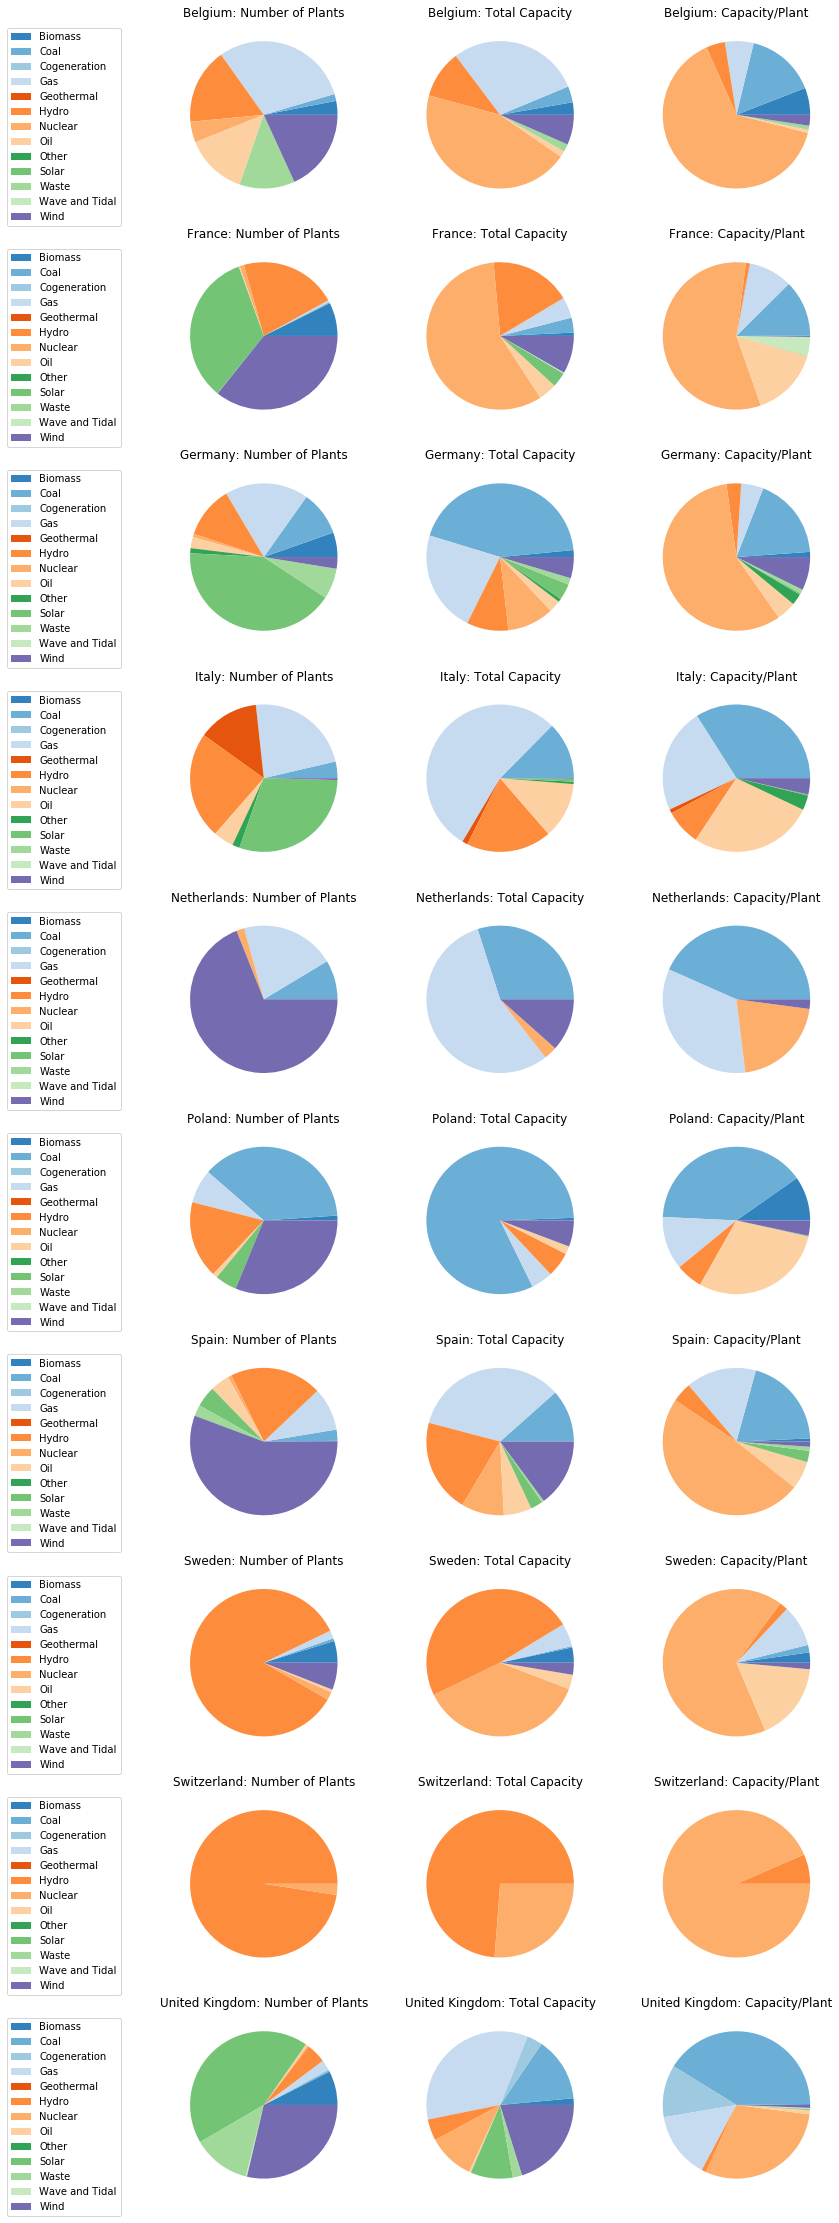

In [7]:
fig, axs = plt.subplots(len(dict_3), 3, figsize=(12, 4*len(dict_3)))

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(13))

for j in range(len(dict_3)):
    axs[j, 0].pie(sizes_1[j], colors=colors)
    axs[j, 1].pie(sizes_2[j], colors=colors)
    axs[j, 2].pie(sizes_3[j], colors=colors)
    
    axs[j, 0].legend(labels=labels, bbox_to_anchor=(-0.25, 1))
    
    country = list(dict_3)[j]
    axs[j, 0].set(title=country + ": Number of Plants") # The total number of this type of plant in this country
    axs[j, 1].set(title=country + ": Total Capacity") # The total capacity output from this type of plant in MW in this country
    axs[j, 2].set(title=country + ": Capacity/Plant") # The mean average capacity output in MW per plant for each type of plant in this country

plt.show()

# The following pie charts are organised as follows
# Each row represents a different country, and each column represents a different calculation
# The three types of calculation are explained above

In [8]:
# Checking that the pie chart for the following country is correct

country_to_check = "United Kingdom"
print(dict_3[country_to_check])
print(dict_4[country_to_check])

{'Biomass': 189, 'Coal': 8, 'Cogeneration': 7, 'Gas': 55, 'Hydro': 111, 'Nuclear': 8, 'Oil': 11, 'Solar': 1092, 'Waste': 321, 'Wave and Tidal': 7, 'Wind': 727}
{'Biomass': 1263.5000000000002, 'Coal': 12296.0, 'Cogeneration': 3006.0, 'Gas': 29916.3, 'Hydro': 4121.905, 'Nuclear': 8918.0, 'Oil': 372.4, 'Solar': 8101.097980000005, 'Waste': 1741.2999999999997, 'Wave and Tidal': 38.2, 'Wind': 17643.481499999998}


#### Green energy metric (arbitrary) and analysis

In [9]:
# This metric is arbitrary and can only give us slight indication for how green the energy in a country is

# To calculate it, we consider each country and add up the capacity output for the renewable energy source
# However we must account for nuclear and cogeneration being somewhere between renewable and unrenewable
# To do this, their contribution to the sumation over capacity outputs is halved
# Then we divide this summation by the total capacity output for that country
# This yields a value for each country which lies between 0 and 1, displayed in the 'metrics' table
# We normalise this by passing each value through an inverse tanh function, displayed in the 'metrics_normalised' table
# Also, in both of these tables we included the 'country_capacity' attribute for later use

c.execute("""
DROP TABLE IF EXISTS metrics;
    """)
c.execute("""
CREATE TABLE metrics AS
SELECT individual_metrics.country_long,
       SUM(individual_metrics.metric) / SUM(individual_metrics.cap) AS metric_norm,
       SUM(individual_metrics.cap) AS country_capacity
FROM
    (
        SELECT country_long,
               primary_fuel,
               SUM(capacity_mw) AS cap,
               CASE
                   WHEN primary_fuel == "Hydro" THEN 1 * SUM(capacity_mw)
                   WHEN primary_fuel == "Wind" THEN 1 * SUM(capacity_mw)
                   WHEN primary_fuel == "Nuclear" THEN 0.5 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Solar" THEN 1 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Waste" THEN 1 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Biomass" THEN 1 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Wave and Tidal" THEN 1 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Geothermal" THEN 1 * SUM(capacity_mw)
                   WHEN "primary_fuel" == "Cogeneration" THEN 0.5 * SUM(capacity_mw)
                   ELSE 0
               END metric
        FROM power_table
        WHERE country_long IN """ + countries + """
        GROUP BY country_long, primary_fuel
        ORDER BY country_long ASC, primary_fuel ASC
    ) AS individual_metrics
    GROUP BY country_long
    ORDER BY country_long ASC;
    """)

dict_metric = {}
for row in c.execute("""
SELECT * FROM metrics;
    """):
    print(row)
    dict_metric[row[0]] = [round(np.arctanh(row[1]), 1), row[2]]

c.execute("""
DROP TABLE IF EXISTS metrics_normalised;
    """)
c.execute("""
CREATE TABLE metrics_normalised (
    country_long TEXT,
    metric_norm REAL,
    country_capacity REAL
);
    """)
for key, value in dict_metric.items():
    c.execute("""
    INSERT INTO metrics_normalised
    VALUES (\"""" + str(key) + """\", """ + str(value[0]) + """, """ + str(value[1]) + """);
        """)
for row in c.execute("""
SELECT * FROM metrics_normalised;
    """):
    print(row)

('Belgium', 0.4378113571030809, 13288.6)
('France', 0.5924887590286605, 109285.32890000001)
('Germany', 0.2543543337966859, 109162.77487999998)
('Italy', 0.20647187887885482, 71573.96)
('Netherlands', 0.13010587756939537, 16748.59)
('Poland', 0.11830510263310644, 37902.0)
('Spain', 0.4332269900883547, 76166.56800000001)
('Sweden', 0.7296990389383278, 26418.699999999997)
('Switzerland', 0.8690619798744827, 13097.800000000001)
('United Kingdom', 0.44466131058685193, 87418.18448)
('Belgium', 0.5, 13288.6)
('France', 0.7, 109285.3289)
('Germany', 0.3, 109162.77487999998)
('Italy', 0.2, 71573.96)
('Netherlands', 0.1, 16748.59)
('Poland', 0.1, 37902.0)
('Spain', 0.5, 76166.56800000001)
('Sweden', 0.9, 26418.699999999997)
('Switzerland', 1.3, 13097.8)
('United Kingdom', 0.5, 87418.18448)


In [10]:
# Performing the join with the GDP table

dict_green_energy_metric = {}
for row in c.execute("""
SELECT metrics_normalised.country_long,
       metrics_normalised.metric_norm,
       metrics_normalised.country_capacity,
       CAST(GDP_table."2018" AS REAL)
FROM metrics_normalised
INNER JOIN GDP_table ON
    metrics_normalised.country_long = GDP_table."Country Name"
    """):
    print(row)
    dict_green_energy_metric[row[0]] = [row[1], row[2], row[3]]
    
print(dict_green_energy_metric)

('Belgium', 0.5, 13288.6, 531767000000.0)
('France', 0.7, 109285.3289, 2777540000000.0)
('Germany', 0.3, 109162.77487999998, 3996760000000.0)
('Italy', 0.2, 71573.96, 2073900000000.0)
('Netherlands', 0.1, 16748.59, 913658000000.0)
('Poland', 0.1, 37902.0, 585783000000.0)
('Spain', 0.5, 76166.56800000001, 1426190000000.0)
('Sweden', 0.9, 26418.699999999997, 551032000000.0)
('Switzerland', 1.3, 13097.8, 705501000000.0)
('United Kingdom', 0.5, 87418.18448, 2825210000000.0)
{'Belgium': [0.5, 13288.6, 531767000000.0], 'France': [0.7, 109285.3289, 2777540000000.0], 'Germany': [0.3, 109162.77487999998, 3996760000000.0], 'Italy': [0.2, 71573.96, 2073900000000.0], 'Netherlands': [0.1, 16748.59, 913658000000.0], 'Poland': [0.1, 37902.0, 585783000000.0], 'Spain': [0.5, 76166.56800000001, 1426190000000.0], 'Sweden': [0.9, 26418.699999999997, 551032000000.0], 'Switzerland': [1.3, 13097.8, 705501000000.0], 'United Kingdom': [0.5, 87418.18448, 2825210000000.0]}


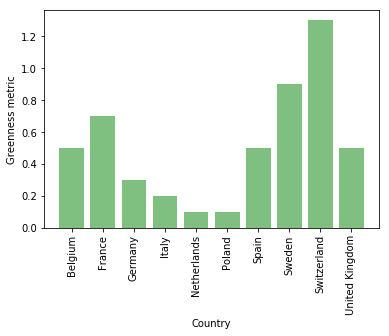

In [11]:
labels = []
green_energy_metric = []
for key, value in dict_green_energy_metric.items():
    labels.append(key)
    green_energy_metric.append(value[0])
x_pos = np.arange(len(labels))

plt.bar(x_pos, green_energy_metric, align='center', alpha=0.5, color="green")
plt.xticks(x_pos, labels, rotation="vertical")
plt.xlabel("Country")
plt.ylabel("Greenness metric")

plt.show()

# The following bar chart displays the value of the arbitrary metric for each country

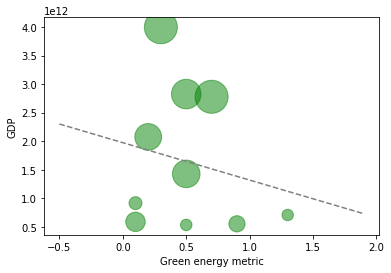

In [12]:
ctry_labels = []
x = []
y = []
area = []
for key, value in dict_green_energy_metric.items():
    ctry_labels.append(key)
    x.append(value[0])
    y.append(value[2])
    area.append(value[1] / 100)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
xp = np.linspace(min(x) - (max(x) - min(x)) / 2, max(x) + (max(x) - min(x)) / 2, 100)

plt.scatter(x, y, s=area, alpha=0.5, c="green")
plt.plot(xp, p(xp), "--", c="gray")
plt.xlabel("Green energy metric")
plt.ylabel("GDP")
plt.show()

# The following scatter plot represents the relationship between the arbitrary metric and the GDP for a country
# You can see that there is a very weak negative correlation

In [13]:
# Finding the covariance matrix for this bivariate data
# This quantitatively verifies the weak negative correlation which we qualitatively deduced above

print(np.corrcoef(x, y))

[[ 1.         -0.20318231]
 [-0.20318231  1.        ]]


In [14]:
conn.commit()
conn.close()